**Authors:** Jozef Hanč, Martina Hančová  <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [martina.hancova@upjs.sk](mailto:martina.hancova@upjs.sk)
***

# <font color = brown, size=6> $\mathcal{GDD}$ pdf analytic expression</font>

<font size=4> Computational tools: </font>  **<font size=4>Sage, SciPy, mpmath, Cython, Pari</font>**  

In [1]:
N = 4 #test up to 10^N pdf values

import numpy as np
import pandas as pd
from numpy import inf as INF, array as v
vec = lambda LIST: vector(LIST)
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from time import time
import math, cmath
import scipy
import platform as pt

# approximate formulas for precisions expressed in bits and decimal places
bits = lambda d:round((d+1)*ln(10)/ln(2)) 
dps = lambda b:round(b*ln(2)/ln(10) - 1)

# accuracy in Python
def abs_errs(df1, df2):
    N = len(df1)
    errors = [abs(df1[i]-df2[i]) for i in range(N)]
    return errors

ver = installed_packages()
tools = ['sagelib', 'scipy', 'mpmath', 'numpy', 'cython', 'matplotlib', 'pari', 'gsl', 'arb']
vers = {tool:ver[tool] for tool in tools}
vers['python'] = pt.python_version()
vers

{'sagelib': '9.2',
 'scipy': '1.5.2',
 'mpmath': '1.1.0',
 'numpy': '1.19.1',
 'cython': '0.29.21',
 'matplotlib': '3.3.1',
 'pari': '2.11.4.p0',
 'gsl': '2.6',
 'arb': '2.16.0.p0',
 'python': '3.7.7'}

## $\mathcal{GDD}$ pdf  $-$ analytic expression

$
f(z)=
\dfrac{\beta_{1}^{\alpha_{1}} \beta_{2}^{\alpha_{2}}}{\beta^{\alpha-1}}
\begin{cases}
{\dfrac{e^{z \beta_{2}}}{\Gamma\left(\alpha_{2}\right)} U\left(1-\alpha_{2}, 2-\alpha,-z \beta\right),} & {z<0} \\[12pt]
\begin{array}{cc} 
\frac{\Gamma(\alpha-1)}{\beta^{a / 2-1} \Gamma\left(\alpha_{1}\right) \Gamma\left(\alpha_{2}\right)}, & \scriptstyle 1<\alpha \\ 
\infty,  & \scriptstyle 0<\alpha \leq 1 
\end{array}, & z=0 \\[12pt] 
{\dfrac{e^{-z \beta_{1}}}{\Gamma\left(\alpha_{1}\right)} U\left(1-\alpha_{1}, 2-\alpha, z \beta\right),} & {z>0}
\end{cases}
$


$\alpha=\alpha_{1}+\alpha_{2}, \quad \beta=\beta_{1}+\beta_{2}$

In [2]:
# pre-calulated analytic quadruple precision results from Pari GP, cross-checked in mpmath and Arb
dpari = {str(10**(n+1)):np.loadtxt('data/Pari_Sage_pdf'+str(10**(n+1))+'.txt', delimiter=',',
                                   dtype=np.longdouble) for n in range(N)}
dx = {str(10**(n+1)):np.loadtxt('data/xvalues'+str(10**(n+1))+'.txt', dtype=np.longdouble) for n in range(N)}

## Sage

In [3]:
a1, b1 = 0.5, 1.0
a2, b2 = 8.5, 93.0

a, b = a1+a2, b1+b2
c = b1^a1*b2^a2/b^(a-1)
cp, cm = c/gamma(a1), c/gamma(a2)

A1, B1 = QQ(a1), QQ(b1)
A2, B2 = QQ(a2), QQ(b2)
A, B = A1+A2, B1+B2
C = B1^A1*B2^A2/B^(A-1)
Cp, Cm = C/gamma(A1), C/gamma(A2)

# defining f(z) - analytic and with numerical conversion .n()
fmS = lambda z: Cm*exp( z*B2)*hypergeometric_U(1-A2,2-A,-B*z)
f0S = lambda z: C*gamma(A-1)/(gamma(A1)*gamma(A2)) if A>1 else oo
fpS= lambda z: Cp*exp(-z*B1)*hypergeometric_U(1-A1,2-A, B*z)

fSage = lambda z: fpS(z) if z > 0 else fmS(z) if z < 0 else f0S(z)
fSagen = lambda z: fSage(z).n()

# defining f(z) - analytic with fast_float command
ffm(z) = Cm*exp( z*B2)*hypergeometric_U(1-A2,2-A,-B*z); fmf = fast_float(ffm(z),z)
ff0(z) = C*gamma(A-1)/(gamma(A1)*gamma(A2)); f0f = fast_float(ff0(z),z)
ffp(z) = Cp*exp(-z*B1)*hypergeometric_U(1-A1,2-A, B*z); fpf = fast_float(ffp(z),z)

fSagef = lambda z: fpf(z) if z > 0 else fmf(z) if z < 0 else f0f(z)

# defining f(z) - numerical 53 bit
fms = lambda z: cm*exp( z*b2)*hypergeometric_U(1-a2,2-a,-b*z)
f0s = lambda z: c*gamma(a-1)/(gamma(a1)*gamma(a2)) if a>1 else oo
fps= lambda z: cp*exp(-z*b1)*hypergeometric_U(1-a1,2-a, b*z)

fsage = lambda z: fps(z) if z > 0 else fms(z) if z < 0 else f0s(z)

# defining f(z) - numerical 53 bit with fast_float command
fmm(z) = cm*exp( z*b2)*hypergeometric_U(1-a2,2-a,-b*z); fmmf = fast_float(fmm(z),z)
f00(z) = c*gamma(a-1)/(gamma(a1)*gamma(a2)); f00f = fast_float(f00(z),z)
fpp(z) = cp*exp(-z*b1)*hypergeometric_U(1-a1,2-a, b*z); fppf = fast_float(fpp(z),z)

fsagef = lambda z: fppf(z) if z > 0 else fmmf(z) if z < 0 else f00f(z)

In [4]:
# cross-checking values
fSage(1), fSagen(1), fSagef(1), fsage(1), fsagef(1)

(5595818096650401/6095689385410816*sqrt(93)*e^(-1)*hypergeometric_U(1/2, -7, 94)/sqrt(pi),
 0.181543521756319,
 0.18154352175631908,
 0.181543521756319,
 0.18154352175631908)

In [5]:
# approx. runtimes per one calculation
%timeit fSagen(1)
%timeit fSagef(1)
%timeit fsage(1)
%timeit fsagef(1)

466 µs ± 4.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
47.3 µs ± 465 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
65.7 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
47.6 µs ± 671 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## mpmath

In [6]:
# setting 53 bits precision - 15 dps
import mpmath as mp
mp.mp.dps = 15
#mp.mp.prec = 128
mp.mp.pretty = True         # use str for output

In [7]:
cmm = mp.mpf(b1**a1*b2**a2/b**(a-1))
cpm, cmm = cmm/mp.gamma(a1), cmm/mp.gamma(a2)

# defining f(z)
fmmp = lambda z: cmm*exp( z*b2)*mp.hyperu(1-a2,2-a,-b*z)
f0mp = lambda z: cmm*mp.gamma(a-1)/(mp.gamma(a1)*mp.gamma(a2)) if a>1 else oo
fpmp = lambda z: cpm*exp(-z*b1)*mp.hyperu(1-a1,2-a, b*z)

fmpm  = lambda z: fpmp(z) if z > 0 else fmmp(z) if z < 0 else f0mp(z)

In [8]:
fmpm(1)

0.181543521756319

## SciPy

In [9]:
# importing scientific python library for fast computing
from scipy import special as sp

In [10]:
ccp, ccm = c/sp.gamma(a1), c/sp.gamma(a2)

# defining f(z)
fmsc = lambda z: ccm*math.exp( z*b2)*sp.hyperu(1-a2,2-a,-b*z)
f0sc = lambda z: c*sp.gamma(a-1)/(sp.gamma(a1)*sp.gamma(a2)) if a>1 else INF
fpsc = lambda z: ccp*math.exp(-z*b1)*sp.hyperu(1-a1,2-a, b*z)

fsci  = lambda z: fpsc(z) if z > 0 else fmsc(z) if z < 0 else f0sc(z)

In [11]:
fsci(1)

0.1815435217563192

## Cython

In [12]:
%load_ext Cython

In [13]:
%%cython
cimport scipy.special.cython_special as cs
cimport libc.math as lc
from numpy.math cimport INFINITY

def fcyt(double z, double a1, double a2, double b1, double b2):
    cdef:
        double a = a1+a2
        double b = b1+b2
        double c = lc.pow(b1,a1)*lc.pow(b2,a2)/lc.pow(b,a-1)
        double d = c*cs.gamma(a-1)/(cs.gamma(a1)*cs.gamma(a2))
        double cp = c/cs.gamma(a1)
        double cm = c/cs.gamma(a2)
        double value
        
    if z<0:
        value = cm*lc.exp( z*b2)*cs.hyperu(1-a2, 2-a,-b*z) 
    elif z>0:
        value = cp*lc.exp(-z*b1)*cs.hyperu(1-a1, 2-a, b*z)
    else:
        if a>1: value = d
        else: value = INFINITY
    return value

In [14]:
fcy = lambda t: fcyt(t, a1, a2, b1, b2)

In [15]:
fcy(1)

0.1815435217563192

## Pilot testing of implementations

In [16]:
pdf = {'Sage.n':fSagen, 'Sagef': fSagef, 'sagef': fsagef, 'mpmath':fmpm, 'Sage53': fsage, 'scipy': fsci, 'cython':fcy}

In [17]:
t = 0.32
runtimes = []
for key, fun in pdf.items():
    print(key, type(fun(t)), 'f('+str(t)+')=', fun(t))
    rt = %timeit -r 3 -n 10 -oq fun(t)
    runtimes += [rt.average]
    %timeit -r 3 -n 10 fun(t)
    print('')

Sage.n <class 'sage.rings.real_mpfr.RealNumber'> f(0.320000000000000)= 0.585131740893960
2.15 ms ± 1.85 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)

Sagef <class 'float'> f(0.320000000000000)= 0.58513174089396
1.81 ms ± 26.4 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)

sagef <class 'float'> f(0.320000000000000)= 0.58513174089396
1.86 ms ± 67.5 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)

mpmath <class 'sage.libs.mpmath.ext_main.mpf'> f(0.320000000000000)= 0.58513174089396
1.81 ms ± 7.97 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)

Sage53 <class 'sage.rings.real_mpfr.RealNumber'> f(0.320000000000000)= 0.585131740893960
1.79 ms ± 14.9 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)

scipy <class 'numpy.float64'> f(0.320000000000000)= 0.5851317408939598
124 µs ± 9.04 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)

cython <class 'float'> f(0.320000000000000)= 0.5851317408939598
84.1 µs ± 424 ns per loop (mean ± std. dev. of 3

In [18]:
runtimes

[0.002215833333078384,
 0.0017752100002932517,
 0.001820656666677678,
 0.0018745000003643024,
 0.0017945499998556138,
 0.00011837999991257674,
 8.376666664844379e-05]

In [19]:
list(runtimes[0]/v(runtimes))

[1.0,
 1.248209131715315,
 1.217051722948853,
 1.1820930022127205,
 1.2347570885495895,
 18.717970389548654,
 26.45244727688528]

# Benchmark

In [20]:
# testing x values
points = lambda n: [-3,-3+7/(n-1),..,4]

In [21]:
methods = list(pdf.keys())
benchmark = pd.DataFrame(index =['10', '100', '1000', '10000'], 
            columns = methods)

In [22]:
list(pdf.keys())

['Sage.n', 'Sagef', 'sagef', 'mpmath', 'Sage53', 'scipy', 'cython']

In [23]:
# start time
tic = time()
for n in range(4):
    sample = points(10^(n+1))
    for method, fun in pdf.items():
        rt = %timeit -r 3 -n 10 -oq [fun(xh) for xh in sample]
        print(10^(n+1), method)
        dm = v([fun(xh) for xh in sample]).astype(np.longdouble)
        dp = dpari[str(10^(n+1))]
        ch_abs = abs_errs(dm,dp)
        benchmark.at[str(10^(n+1)),method] = [rt.average, rt.stdev, min(ch_abs), max(ch_abs)]
    #end time
    toc = time()-tic; 
    print(25*'*')
    print(10**(n+1),' runtime =',toc,'s')
    for method in list(pdf.keys()):
        print(method, vec(benchmark.loc[str(10**(n+1)),method]).n(digits = 2))
    print(25*'*')
    print(25*'*')

10 Sage.n
10 Sagef
10 sagef
10 mpmath
10 Sage53
10 scipy
10 cython
*************************
10  runtime = 0.984874963760376 s
Sage.n (0.0096, 0.00025, 6.3e-124, 3.1e-17)
Sagef (0.0051, 0.000086, 6.3e-124, 3.1e-17)
sagef (0.0051, 0.00017, 1.3e-122, 1.9e-16)
mpmath (0.0056, 0.000039, 6.3e-124, 3.1e-17)
Sage53 (0.0055, 0.000068, 6.3e-124, 3.1e-17)
scipy (0.00045, 0.000018, 2.4e-122, 1.9e-16)
cython (0.000093, 1.5e-6, 2.4e-122, 1.9e-16)
*************************
*************************
100 Sage.n
100 Sagef
100 sagef
100 mpmath
100 Sage53
100 scipy
100 cython
*************************
100  runtime = 8.566607475280762 s
Sage.n (0.086, 0.0031, 6.3e-124, 1.1e-15)
Sagef (0.037, 0.00020, 6.3e-124, 1.8e-15)
sagef (0.037, 0.00021, 1.3e-122, 1.3e-15)
mpmath (0.041, 0.00071, 6.3e-124, 1.5e-15)
Sage53 (0.039, 0.00042, 6.3e-124, 1.5e-15)
scipy (0.0039, 0.000029, 2.4e-122, 2.4e-11)
cython (0.00056, 0.000013, 2.4e-122, 2.4e-11)
*************************
*************************
1000 Sage.n
1000 Sage

# Results

In [24]:
scn = lambda series, prec: [np.format_float_scientific(item, precision=prec) for item in v(series)]
benchres = benchmark
benchres

,Sage.n,Sagef,sagef,mpmath,Sage53,scipy,cython
10,"[0.009588489999684195, 0.00025050930672308524,...","[0.005084900000171425, 8.64577957052308e-05, 6...","[0.00511957666676608, 0.00017094077052086745, ...","[0.005596186666662106, 3.873485421518859e-05, ...","[0.005454096666411109, 6.77601304313055e-05, 6...","[0.00044597666662108776, 1.826810964670279e-05...","[9.32366664831837e-05, 1.4818082026821212e-06,..."
100,"[0.0860049000000193, 0.0031065166125302385, 6....","[0.03654373999985788, 0.00020177984991357644, ...","[0.036809526666669014, 0.00021029598888960195,...","[0.040904919999835934, 0.0007060419008664383, ...","[0.039143619999958905, 0.0004224077192604092, ...","[0.003924666666474271, 2.9298377918303398e-05,...","[0.000562990000131928, 1.3421373252397381e-05,..."
1000,"[0.8330543366665855, 0.02825220348808231, 6.32...","[0.37136791000011726, 0.0002816920380177585, 6...","[0.37111743999994357, 0.0007937707039788673, 1...","[0.4031980166665259, 9.830548907531482e-05, 6....","[0.3910407666667501, 0.000224913402858317, 6.3...","[0.03934012333338615, 7.117919025106239e-05, 2...","[0.005851816666593852, 2.4892532145760814e-05,..."
10000,"[8.562566959999822, 0.45930051398667693, 0.0, ...","[3.756837010000163, 0.013084106530604468, 0.0,...","[3.7358952033335906, 0.0018601345360791616, 0....","[4.054545016666573, 0.0053875873458806576, 6.3...","[3.930299429999771, 0.0047766701627461276, 0.0...","[0.39322508666664363, 0.0007337544592898617, 2...","[0.05768693999974251, 0.00025242953479259387, ..."


# cross-checking: plots

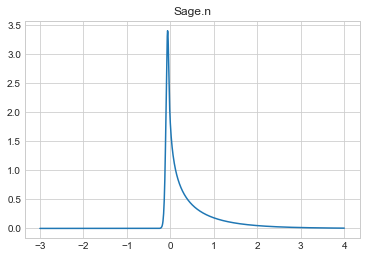

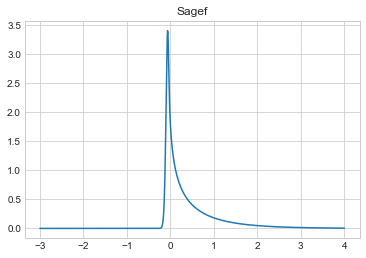

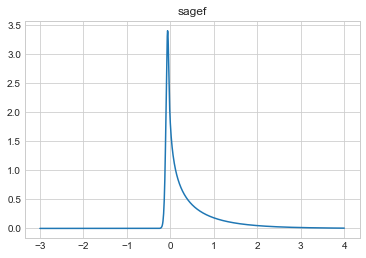

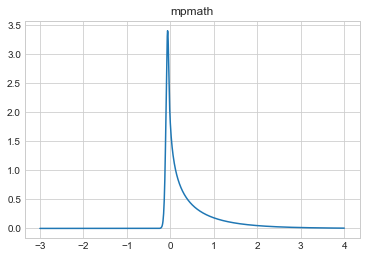

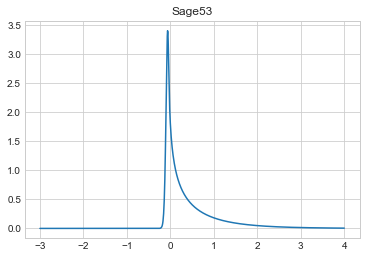

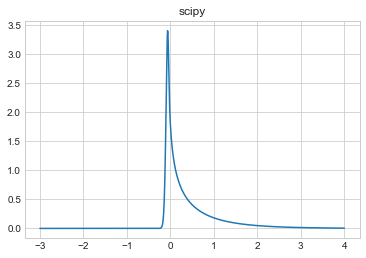

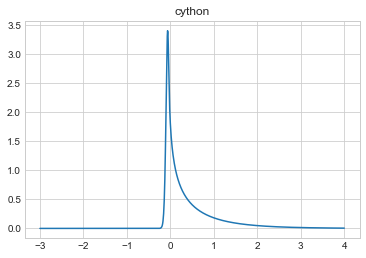

In [25]:
xh = points(1000)
for method in pdf.keys():
    yh = [pdf[method](x) for x in xh]
    plt.plot(xh,yh)
    plt.title(method)
    plt.show();

## Run Times

In [26]:
# average runtimes
times = benchres.applymap(lambda x: x[0])
times

,Sage.n,Sagef,sagef,mpmath,Sage53,scipy,cython
10,0.009588,0.005085,0.005120,0.005596,0.005454,0.000446,0.000093
100,0.086005,0.036544,0.036810,0.040905,0.039144,0.003925,0.000563
1000,0.833054,0.371368,0.371117,0.403198,0.391041,0.039340,0.005852
10000,8.562567,3.756837,3.735895,4.054545,3.930299,0.393225,0.057687


In [27]:
# relative stdev = variation coeficient in %
delta = benchres.applymap(lambda x:x[1]/x[0])
delta.multiply(100)

,Sage.n,Sagef,sagef,mpmath,Sage53,scipy,cython
10,2.612604,1.700285,3.338963,0.692165,1.242371,4.096203,1.589298
100,3.612023,0.552160,0.571309,1.726056,1.079123,0.746519,2.383945
1000,3.391400,0.075853,0.213887,0.024381,0.057517,0.180933,0.425381
10000,5.364052,0.348275,0.049791,0.132878,0.121535,0.186599,0.437585


In [28]:
tmax = times.max()
tmax

Sage.n    8.562567
Sagef     3.756837
sagef     3.735895
mpmath    4.054545
Sage53    3.930299
scipy     0.393225
cython    0.057687
dtype: float64

In [29]:
times.apply(lambda x: scn(x,2))

,Sage.n,Sagef,sagef,mpmath,Sage53,scipy,cython
10,9.59e-03,5.08e-03,5.12e-03,5.6e-03,5.45e-03,4.46e-04,9.32e-05
100,8.60e-02,3.65e-02,3.68e-02,4.09e-02,3.91e-02,3.92e-03,5.63e-04
1000,8.33e-01,3.71e-01,3.71e-01,4.03e-01,3.91e-01,3.93e-02,5.85e-03
10000,8.56e+00,3.76e+00,3.74e+00,4.05e+00,3.93e+00,3.93e-01,5.77e-02


## Errors

In [30]:
errs = benchres.applymap(lambda x: scn(x[2:], 0))

In [31]:
errs

,Sage.n,Sagef,sagef,mpmath,Sage53,scipy,cython
10,"[6.e-124, 3.e-17]","[6.e-124, 3.e-17]","[1.e-122, 2.e-16]","[6.e-124, 3.e-17]","[6.e-124, 3.e-17]","[2.e-122, 2.e-16]","[2.e-122, 2.e-16]"
100,"[6.e-124, 1.e-15]","[6.e-124, 2.e-15]","[1.e-122, 1.e-15]","[6.e-124, 2.e-15]","[6.e-124, 2.e-15]","[2.e-122, 2.e-11]","[2.e-122, 2.e-11]"
1000,"[6.e-124, 3.e-15]","[6.e-124, 2.e-15]","[1.e-122, 2.e-15]","[6.e-124, 2.e-15]","[6.e-124, 2.e-15]","[2.e-122, 4.e-10]","[2.e-122, 4.e-10]"
10000,"[0.e+00, 3.e-15]","[0.e+00, 3.e-15]","[0.e+00, 3.e-15]","[6.e-124, 3.e-15]","[0.e+00, 3.e-15]","[2.e-122, 5.e-10]","[2.e-122, 5.e-10]"


# Pari implementation - p15

In [32]:
%%gp
\p15
\\ defining U and G
U(u,v,t) = hyperu(u,v,t);
G(s) = gamma(s);

[a1, b1, a2, b2] = [0.5, 1, 8.5, 93];
a = a1+a2; b = b1+b2;
c = b1^a1*b2^a2/b^(a-1);
cp = c/G(a1); cm = c/G(a2);

\\ defining f(z)
fm(z) = cm*exp( z*b2)*U(1-a2,2-a,-b*z);
f0(z) = if(a>1, c*G(a-1)/(G(a1)*G(a2)), oo);
fp(z) = cp*exp(-z*b1)*U(1-a1,2-a, b*z);

f(z) = if(z>0, fp(z), /*if*/ z<0, fm(z), /*else*/f0(z));

\\ measuring time
runtime(n) = { gettime(); forstep(i = -3, 4, 7/(n-1), F = f(i)); gettime()};
\\ generating function values
fvalues(n) = { flist = vector(n); for(i= 1, n, flist[i] = f(-3+7/(n-1)*(i-1))); flist};

\\timing
fvaluestime(n) = { gettime(); flist = vector(n); for(i= 1, n, flist[i] = f(-3+7/(n-1)*(i-1))); gettime()};

   realprecision = 19 significant digits (15 digits displayed)




















In [33]:
bits(19), dps(70)

(66, 20)

In [34]:
RRf = RealField(70)
fpari = lambda t:RRf(gp("f("+str(t)+")"))

In [35]:
fpari(1)

0.18154352175631900000

In [36]:
Parivalues = lambda n: (gp("fvalues("+str(n)+")"))._sage_()
pari = {str(10^(n+1)): Parivalues(10^(n+1)) for n in range(N)}
parierrors = {str(len(dp)): abs_errs(dpari, dp) for dpari,dp in zip(pari.values(), dpari.values())}

In [37]:
Parierrs = {str(len(eabs)): [min(eabs), max(eabs)] for eabs in parierrors.values()} 
Parierrs

{'10': [4.350343160448023385e-121, 2.3789889329328683942e-14],
 '100': [4.350343160448023385e-121, 4.1581321719164066053e-14],
 '1000': [2.053532626721855295e-121, 4.6290662275572103113e-14],
 '10000': [1.9878233644947977707e-122, 5.1877881331041653112e-14]}

In [38]:
Tparivalues = lambda n: gp("fvaluestime("+str(n)+")")._sage_()
Tparivalues(10000)

312

In [39]:
Tpari = lambda n: gp("runtime("+str(n)+")")._sage_()
def Timeit(n, r = 3, rep = 10):
    times = []
    for k in range(r):
        times += [RR(mean([Tparivalues(n) for i in range(rep)]))]
    return mean(times), std(times)/sqrt(rep-1)    

In [40]:
# start time
Paritimes = dict()
tic = time()
for n in range(4):
    casdev = Timeit(10^(n+1))
    Paritimes[str(10^(n+1))] = casdev
    print('10^'+str(n+1)+' pari runtime = ', casdev)
    toc = time()-tic; 
    print('Sage runtime =',toc,'s')

10^1 pari runtime =  (0.000000000000000, 0.000000000000000)
Sage runtime = 4.0137879848480225 s
10^2 pari runtime =  (1.56666666666667, 0.0192450089729875)
Sage runtime = 8.018442630767822 s
10^3 pari runtime =  (28.7000000000000, 0.290593262902711)
Sage runtime = 12.84458327293396 s
10^4 pari runtime =  (317.500000000000, 1.05039675043925)
Sage runtime = 26.698570728302002 s


In [41]:
Parisec = v([t[0] for t in Paritimes.values()])/1000
Parisec

array([0.        , 0.00156667, 0.0287    , 0.3175    ])

# Pari implementation - p20

In [42]:
%%gp
\p20
\\ defining U and G
U2(u,v,t) = hyperu(u,v,t);
G2(s) = gamma(s);

[a1, b1, a2, b2] = [0.5, 1, 8.5, 93];
a = a1+a2; b = b1+b2;
c = b1^a1*b2^a2/b^(a-1);
cp = c/G2(a1); cm = c/G2(a2);

\\ defining f(z)
fm2(z) = cm*exp( z*b2)*U2(1-a2,2-a,-b*z);
f02(z) = if(a>1, c*G2(a-1)/(G2(a1)*G2(a2)), oo);
fp2(z) = cp*exp(-z*b1)*U(1-a1,2-a, b*z);

f2(z) = if(z>0, fp2(z), /*if*/ z<0, fm2(z), /*else*/f02(z));

\\ measuring time
runtime2(n) = { gettime(); forstep(i = -3, 4, 7/(n-1), F2 = f2(i)); gettime()};
\\ generating function values
fvalues2(n) = { flist2 = vector(n); for(i= 1, n, flist2[i] = f2(-3+7/(n-1)*(i-1))); flist2};
\\timing
fvaluestime2(n) = { gettime(); flist2 = vector(n); for(i= 1, n, flist2[i] = f2(-3+7/(n-1)*(i-1))); gettime()};

   realprecision = 38 significant digits (20 digits displayed)




















In [43]:
bits(38), dps(130)

(130, 38)

In [44]:
RRf = RealField(70)
fpari2 = lambda t:RRf(gp("f2("+str(t)+")"))

In [45]:
Parivalues2 = lambda n: (gp("fvalues2("+str(n)+")"))._sage_()
pari2 = {str(10^(n+1)): Parivalues2(10^(n+1)) for n in range(N)}
parierrors2 = {str(len(dp)): abs_errs(dpari, dp) for dpari,dp in zip(pari2.values(), dpari.values())}

In [46]:
Parierrs2 = {str(len(eabs)): [min(eabs), max(eabs)] for eabs in parierrors2.values()} 
Parierrs2

{'10': [6.3227437574596718627e-124, 3.1116602350333977256e-17],
 '100': [6.3227437574596718627e-124, 5.898059818321144121e-17],
 '1000': [0.0, 2.1510571102112407971e-16],
 '10000': [0.0, 2.2052672188355160188e-16]}

In [47]:
Tparivalues2 = lambda n: gp("fvaluestime2("+str(n)+")")._sage_()
Tparivalues2(10000)

1140

In [48]:
Tpari2 = lambda n: gp("runtime2("+str(n)+")")._sage_()
def Timeit2(n, r = 3, rep = 10):
    times = []
    for k in range(r):
        times += [RR(mean([Tparivalues2(n) for i in range(rep)]))]
    return mean(times), std(times)/sqrt(rep-1)    

In [49]:
# start time
Paritimes2 = dict()
tic = time()
for n in range(4):
    casdev = Timeit2(10^(n+1))
    Paritimes2[str(10^(n+1))] = casdev
    print('10^'+str(n+1)+' pari runtime = ', casdev)
    toc = time()-tic; 
    print('Sage runtime =',toc,'s')

10^1 pari runtime =  (0.533333333333333, 0.307920143567800)
Sage runtime = 4.003103971481323 s
10^2 pari runtime =  (0.000000000000000, 0.000000000000000)
Sage runtime = 8.019315242767334 s
10^3 pari runtime =  (116.266666666667, 2.12533221803958)
Sage runtime = 15.529682636260986 s
10^4 pari runtime =  (1156.40000000000, 4.68342230045985)
Sage runtime = 54.31274056434631 s


In [50]:
Parisec2 = v([t[0] for t in Paritimes2.values()])/1000
Parisec

array([0.        , 0.00156667, 0.0287    , 0.3175    ])

# Final

In [51]:
times['Pari-p15'] = v([t[0] for t in Paritimes.values()])/1000
times['Pari-p20'] = v([t[0] for t in Paritimes2.values()])/1000
times

,Sage.n,Sagef,sagef,mpmath,Sage53,scipy,cython,Pari-p15,Pari-p20
10,0.009588,0.005085,0.005120,0.005596,0.005454,0.000446,0.000093,0.000000,0.000533
100,0.086005,0.036544,0.036810,0.040905,0.039144,0.003925,0.000563,0.001567,0.000000
1000,0.833054,0.371368,0.371117,0.403198,0.391041,0.039340,0.005852,0.028700,0.116267
10000,8.562567,3.756837,3.735895,4.054545,3.930299,0.393225,0.057687,0.317500,1.156400


In [52]:
for colname in times.columns[times.columns.str.contains('Pari')]:
    col = times[colname]
    altval = col['10000']/v([10^n for n in [3,2..0]])
    col[col==0] = altval[col==0]

In [53]:
times

,Sage.n,Sagef,sagef,mpmath,Sage53,scipy,cython,Pari-p15,Pari-p20
10,0.009588,0.005085,0.005120,0.005596,0.005454,0.000446,0.000093,0.000318,0.000533
100,0.086005,0.036544,0.036810,0.040905,0.039144,0.003925,0.000563,0.001567,0.011564
1000,0.833054,0.371368,0.371117,0.403198,0.391041,0.039340,0.005852,0.028700,0.116267
10000,8.562567,3.756837,3.735895,4.054545,3.930299,0.393225,0.057687,0.317500,1.156400


In [54]:
# reference python times for pdf
tWpy = 3.7066538833333325/2

In [55]:
accel = times.apply(lambda x:tWpy/v(x)).applymap(lambda x: round(x,3))
accel.filter(like='10000', axis=0)

,Sage.n,Sagef,sagef,mpmath,Sage53,scipy,cython,Pari-p15,Pari-p20
10000,0.216,0.493,0.496,0.457,0.472,4.713,32.127,5.837,1.603


In [56]:
errs['Pari-p15'] = [scn(item,0) for item in Parierrs.values()]
errs['Pari-p20'] = [scn(item,0) for item in Parierrs2.values()]
errs

,Sage.n,Sagef,sagef,mpmath,Sage53,scipy,cython,Pari-p15,Pari-p20
10,"[6.e-124, 3.e-17]","[6.e-124, 3.e-17]","[1.e-122, 2.e-16]","[6.e-124, 3.e-17]","[6.e-124, 3.e-17]","[2.e-122, 2.e-16]","[2.e-122, 2.e-16]","[4.e-121, 2.e-14]","[6.e-124, 3.e-17]"
100,"[6.e-124, 1.e-15]","[6.e-124, 2.e-15]","[1.e-122, 1.e-15]","[6.e-124, 2.e-15]","[6.e-124, 2.e-15]","[2.e-122, 2.e-11]","[2.e-122, 2.e-11]","[4.e-121, 4.e-14]","[6.e-124, 6.e-17]"
1000,"[6.e-124, 3.e-15]","[6.e-124, 2.e-15]","[1.e-122, 2.e-15]","[6.e-124, 2.e-15]","[6.e-124, 2.e-15]","[2.e-122, 4.e-10]","[2.e-122, 4.e-10]","[2.e-121, 5.e-14]","[0.e+00, 2.e-16]"
10000,"[0.e+00, 3.e-15]","[0.e+00, 3.e-15]","[0.e+00, 3.e-15]","[6.e-124, 3.e-15]","[0.e+00, 3.e-15]","[2.e-122, 5.e-10]","[2.e-122, 5.e-10]","[2.e-122, 5.e-14]","[0.e+00, 2.e-16]"


In [57]:
errs.applymap(lambda x:x[:2])

,Sage.n,Sagef,sagef,mpmath,Sage53,scipy,cython,Pari-p15,Pari-p20
10,"[6.e-124, 3.e-17]","[6.e-124, 3.e-17]","[1.e-122, 2.e-16]","[6.e-124, 3.e-17]","[6.e-124, 3.e-17]","[2.e-122, 2.e-16]","[2.e-122, 2.e-16]","[4.e-121, 2.e-14]","[6.e-124, 3.e-17]"
100,"[6.e-124, 1.e-15]","[6.e-124, 2.e-15]","[1.e-122, 1.e-15]","[6.e-124, 2.e-15]","[6.e-124, 2.e-15]","[2.e-122, 2.e-11]","[2.e-122, 2.e-11]","[4.e-121, 4.e-14]","[6.e-124, 6.e-17]"
1000,"[6.e-124, 3.e-15]","[6.e-124, 2.e-15]","[1.e-122, 2.e-15]","[6.e-124, 2.e-15]","[6.e-124, 2.e-15]","[2.e-122, 4.e-10]","[2.e-122, 4.e-10]","[2.e-121, 5.e-14]","[0.e+00, 2.e-16]"
10000,"[0.e+00, 3.e-15]","[0.e+00, 3.e-15]","[0.e+00, 3.e-15]","[6.e-124, 3.e-15]","[0.e+00, 3.e-15]","[2.e-122, 5.e-10]","[2.e-122, 5.e-10]","[2.e-122, 5.e-14]","[0.e+00, 2.e-16]"


In [58]:
bench = times.applymap(lambda x: [x])+errs
bench

,Sage.n,Sagef,sagef,mpmath,Sage53,scipy,cython,Pari-p15,Pari-p20
10,"[0.009588489999684195, 6.e-124, 3.e-17]","[0.005084900000171425, 6.e-124, 3.e-17]","[0.00511957666676608, 1.e-122, 2.e-16]","[0.005596186666662106, 6.e-124, 3.e-17]","[0.005454096666411109, 6.e-124, 3.e-17]","[0.00044597666662108776, 2.e-122, 2.e-16]","[9.32366664831837e-05, 2.e-122, 2.e-16]","[0.0003175000000000001, 4.e-121, 2.e-14]","[0.0005333333333333334, 6.e-124, 3.e-17]"
100,"[0.0860049000000193, 6.e-124, 1.e-15]","[0.03654373999985788, 6.e-124, 2.e-15]","[0.036809526666669014, 1.e-122, 1.e-15]","[0.040904919999835934, 6.e-124, 2.e-15]","[0.039143619999958905, 6.e-124, 2.e-15]","[0.003924666666474271, 2.e-122, 2.e-11]","[0.000562990000131928, 2.e-122, 2.e-11]","[0.0015666666666666667, 4.e-121, 4.e-14]","[0.011564000000000001, 6.e-124, 6.e-17]"
1000,"[0.8330543366665855, 6.e-124, 3.e-15]","[0.37136791000011726, 6.e-124, 2.e-15]","[0.37111743999994357, 1.e-122, 2.e-15]","[0.4031980166665259, 6.e-124, 2.e-15]","[0.3910407666667501, 6.e-124, 2.e-15]","[0.03934012333338615, 2.e-122, 4.e-10]","[0.005851816666593852, 2.e-122, 4.e-10]","[0.028700000000000003, 2.e-121, 5.e-14]","[0.11626666666666667, 0.e+00, 2.e-16]"
10000,"[8.562566959999822, 0.e+00, 3.e-15]","[3.756837010000163, 0.e+00, 3.e-15]","[3.7358952033335906, 0.e+00, 3.e-15]","[4.054545016666573, 6.e-124, 3.e-15]","[3.930299429999771, 0.e+00, 3.e-15]","[0.39322508666664363, 2.e-122, 5.e-10]","[0.05768693999974251, 2.e-122, 5.e-10]","[0.31750000000000006, 2.e-122, 5.e-14]","[1.1564, 0.e+00, 2.e-16]"


In [59]:
bench.to_csv('pdfAnalyticComparison.csv')

***
<a id=references></a>
# <font color=brown> References </font>
This notebook belongs to supplementary materials of the paper submitted to Journal of Statistical Computation and
Simulation and available at  <https://arxiv.org/abs/2105.04427>.
* Hančová, M., Gajdoš, A., Hanč, J. (2021). A practical, effective calculation of gamma difference distributions with open data science tools. arXiv:2105.04427 [cs, math, stat], https://arxiv.org/abs/2105.04427

### Abstract of the paper

At present, there is still no officially accepted and extensively verified implementation of computing the gamma difference distribution allowing unequal shape parameters. We explore four computational ways of the gamma difference distribution with the different shape parameters resulting from time series kriging, a forecasting approach based on the best linear unbiased prediction, and linear mixed models. The results of our numerical study, with emphasis on using open data science tools, demonstrate that our open tool implemented in high-performance Python(with Numba) is exponentially fast, highly accurate, and very reliable. It combines numerical inversion of the characteristic function and the trapezoidal rule with the double exponential oscillatory transformation (DE quadrature). At the double 53-bit precision, our tool outperformed the speed of the analytical computation based on Tricomi's $U(a, b, z)$ function in CAS software (commercial Mathematica, open SageMath) by 1.5-2 orders. At the precision of scientific numerical computational tools, it exceeded open SciPy, NumPy, and commercial MATLAB 5-10 times. The potential future application of our tool for a mixture of characteristic functions could open new possibilities for fast data analysis based on exact probability distributions in areas like multidimensional statistics, measurement uncertainty analysis in metrology as well as in financial mathematics and risk analysis. 